import important libraies 

In [14]:
#I have imported the data from sklearn instead download from internet
from sklearn.datasets import fetch_20newsgroups
# import string libreary to remove punctuation from our text
import string
#remove stop words because it occurs many times and common in every document
from nltk.corpus import stopwords
#use tokenizer to make my work easier
from nltk.tokenize import word_tokenize
# use for spliting the data into train test split
from sklearn.model_selection import train_test_split
# use for data handling
import numpy as np
# use to apply this on test_classification
from sklearn.naive_bayes import MultinomialNB

In [15]:
#assign the name to data sets
newsgroups=fetch_20newsgroups() 
#these are the stopwords which are not required for vocabulary
stops=set(stopwords.words('english'))
#punctuation marks are also not required for our vocabulary.
punctuations=list(string.punctuation)
#set of stop words and  punctuation marks
stops.update(punctuations)
print(len(stops))


211


In [16]:
len(newsgroups.data)
#checking amount of document

11314

In [18]:
import nltk
nltk.download('punkt')
x_doc=newsgroups.data
#x_doc contains all the "X" data in un-tokenized form.
y_doc=newsgroups.target
#y_doc contain all the "Y" data.
x_doc_modified=[word_tokenize(doc) for doc in x_doc]
#i have modified the x_doc to a form in which we have list of list of words

[nltk_data] Downloading package punkt to C:\Users\Akshat
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [19]:
#splitting in train and test data.
x_train, x_test, y_train, y_test=train_test_split(x_doc_modified, y_doc, random_state=1)

In [20]:
All_words=[]
#this variable is going to contain all the words from all our tokenized documents.
for doc in x_train:
    for word in doc:
        # Make somemore condition to ignore some more useless words
        if (word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!="n't" and word[0]!=".":
            
            All_words.append(word)

In [21]:
#check lenght of vocabulary
len(All_words)

1385691

In [22]:
#function to make dictionary{key:words,values:amount of words} 
def frequency_dict(All_words):
    dic=dict()
    for word in All_words:
        if word in dic.keys():
            dic[word]+=1
        else:
            dic[word]=1
    return dic

dic=frequency_dict(All_words)


In [24]:
#break dict in two array 
frequency=np.array([i for i in dic.values()])
words=np.array([i for i in dic.keys()])
#and sort them first sort them in ascending order and then reverse them
words=words[np.argsort(frequency)][::-1]
frequency=np.sort(frequency)[::-1]

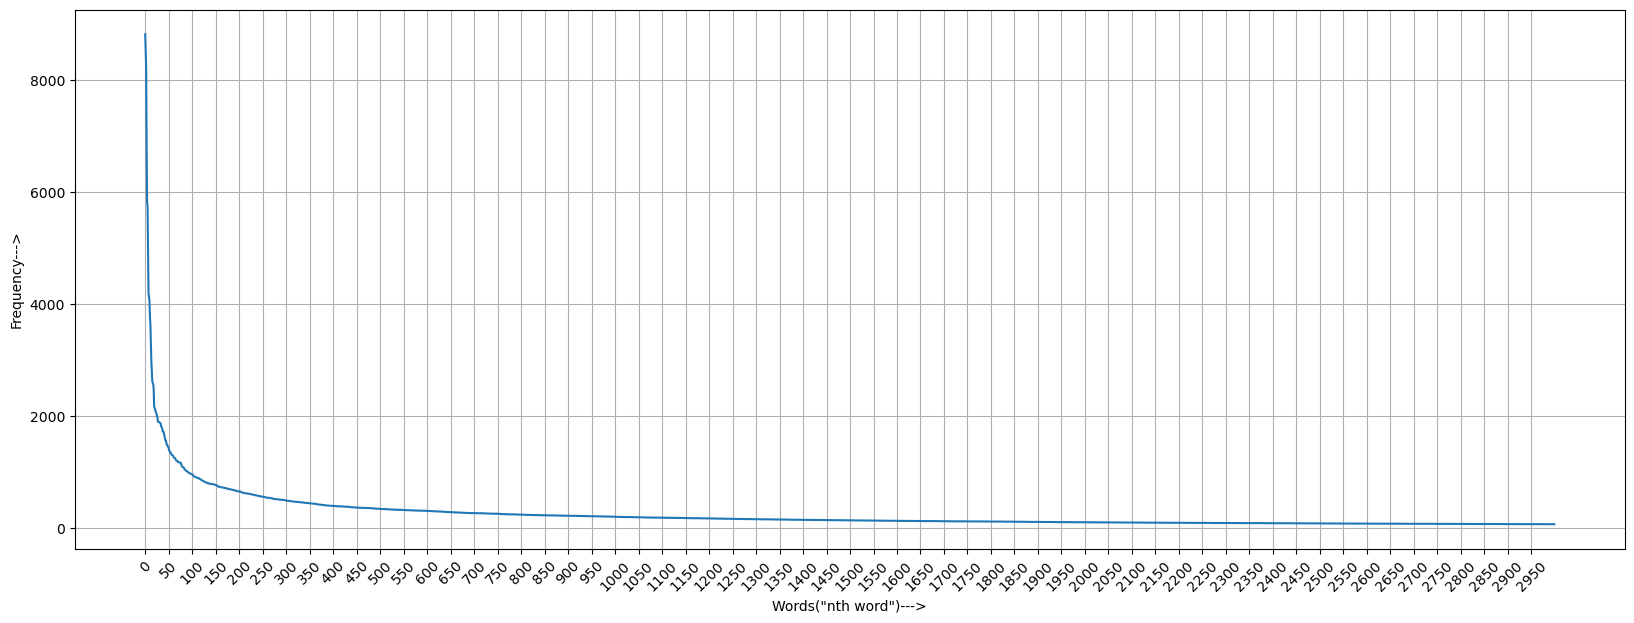

In [27]:
#This cell draws a frequency distribution graph
import matplotlib.pyplot as plt

lower_limit=0   
upper_limit=3000    
difference_between_each_xtick=50
plt.figure(figsize=(20, 7))
#plotting
plt.plot(np.arange(len(frequency))[lower_limit:upper_limit], frequency[lower_limit:upper_limit])
#labelling
plt.xlabel('Words("nth word")--->')
plt.ylabel("Frequency--->")
#adjusting the xticks
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()
#observe the following graph

In [29]:
#i don't want those which are occuring most of the time and i dont those words which are less ocurring
features=words[50:100000]

frequency[50], frequency[10000]


(1428, 18)

In [30]:
#it is fucntion which convert our x_train ,y_train data into frindly manner
def data_modifier(x_data, features):
    modified_data=np.zeros((len(x_data), len(features)))
    max_count=len(x_data)
    for i in range(len(x_data)):
        #looping over each and every row in the x_data
        current_doc=x_data[i]
        #current_doc contains the current document on which we are working
        d=dict()
        #this dictionary contains the frequency of all the elements in our current_doc.
        for word in current_doc:
            if word in d.keys():
                d[word]+=1
            else:
                d[word]=1
        #dictionary created
        for j in range(len(features)):
            #now for each feature in features we will insert the value of the dictionary for the corresponding. that is, 
            #the frequency of each feature in that current document.
            if features[j] in d.keys():
                modified_data[i][j]=d[features[j]]
            else:
                #if the current feature is not in the dictionary, it will remain 0 in the modified_data 2D matrix
                continue
        
    return modified_data 


In [32]:
x_train_m = data_modifier(x_train, features)
#assigning the value of upper function to x_train_m
x_test_m= data_modifier(x_test, features)
#modified testing data

So finally we have got our vocabulary and the data in which format we want then 
## i am appling in-built multinomial naive bayes

In [45]:
clf=MultinomialNB()
clf.fit(x_train_m, y_train)

clf.score(x_test_m, y_test)


0.8861788617886179

## Writing own naive bayes classifier
=> firstly we create our fit fucntion
=> then we create predict function
=> then we create predict single point
=> then we create probability function

In [35]:
# this fit function just convert data into dictionary format
def fit(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        #these are all the documents we need to work upon
        count[i]=dict()
        #count is a dictionary whose each key is yet another dictionary.
        count[i]['total']=0
        #it will maintain the total number of words in class i.
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            #it gives me how many times jth feature is coming
            count[i]['total']+=count[i][features[j]]
            #this additional key named "total" stores the sum of all the values.
    
    return count

In [37]:
# its take x_test data and dictionary(this dict is returned from our fit function)
def predict(x_test, dic):
    y_pred=[]
    #y_pred maintains all the predicted classes 
    for doc in x_test:
        #iterating each document
        y_pred.append(predict_single_point(dic, doc))
        #for each testing data point, we will append the value of predicted class to y_pred. and we will get that value from predict single point
   
    return y_pred

In [38]:
def predict_single_point(dic, x):
    classes = dictionary.keys()
    # initiated some assumed  value to get them updated
    best_p = -1000
    best_class = -1
    first_run = True
    
    for current_class in classes:
        #iterating through each and every class in all possible classes.
        p_current_class = probability(dic, x, current_class)
        #p_current_class denotes the probability of current class.
        if (first_run or p_current_class > best_p):
            # if probaality of p_current_class is better than best_p then we will update best_p
            best_p = p_current_class
            best_class = current_class
            #updated
        first_run = False
    
    return best_class

In [41]:
def probability(dictionary, x, current_class):
    probability_for_each_word=[]
    #stores all the prob avlues for each word.
    for i in range(len(x)):
        #iterating through each feature.
        if x[i]!=0:
            # i am skipping those values which are not present in particular doc.
            numerator=dictionary[current_class][features[i]]
            denominator=dictionary[current_class]['total']
            prob=np.log((numerator+1)/(denominator+len(x)))
            probability_for_each_word.append(prob)
            # append all values in the list we built
           
    return sum(probability_for_each_word)

In [42]:
#calling the fit function
dictionary=fit(x_train_m, y_train)
#calling the predict funtion
y_pred=predict(x_test_m, dictionary)

In [47]:
from sklearn.metrics import confusion_matrix

for i in confusion_matrix(y_true=y_test, y_pred=y_pred):
    for j in i:
        print(j, end="    ")
    print()

103    0    0    0    0    0    0    0    0    0    0    0    0    0    0    5    0    3    0    3    
0    121    1    7    0    13    1    0    0    0    0    6    0    0    1    1    0    0    1    0    
0    3    86    13    1    28    0    1    0    0    0    6    0    0    1    0    0    0    0    0    
0    5    2    123    4    6    3    0    0    0    0    5    2    0    0    1    0    1    0    0    
0    2    0    3    122    2    3    1    0    0    0    2    0    1    0    0    0    1    1    0    
0    3    0    0    1    147    0    0    0    0    0    0    0    1    0    0    0    0    1    0    
0    4    0    8    4    3    91    4    2    3    3    5    10    1    1    0    1    2    5    0    
0    0    0    0    0    0    4    118    0    1    0    0    3    1    3    1    1    1    4    0    
0    0    0    0    0    0    2    1    124    0    0    0    0    0    0    0    4    0    0    0    
0    1    0    0    0    0    0    0    0    128    1    0    0    1   

In [48]:
from sklearn.metrics import classification_report
#printing the classification report for our own naive bayes classifier.
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       114
           1       0.81      0.80      0.80       152
           2       0.97      0.62      0.75       139
           3       0.76      0.81      0.79       152
           4       0.90      0.88      0.89       138
           5       0.72      0.96      0.82       153
           6       0.87      0.62      0.72       147
           7       0.92      0.86      0.89       137
           8       0.98      0.95      0.96       131
           9       0.96      0.95      0.95       135
          10       0.96      0.98      0.97       136
          11       0.81      1.00      0.89       145
          12       0.89      0.80      0.84       157
          13       0.95      0.97      0.96       151
          14       0.91      0.94      0.92       155
          15       0.82      0.95      0.88       159
          16       0.87      0.96      0.92       140
          17       0.88    